In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 1. Load and preprocess data

In [2]:
df = pd.read_csv("customer.csv")
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
# Rename columns for simplicity
mapping = {'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'}
df = df.rename(columns=mapping)

# Encode Gender
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

# Select features (drop CustomerID)
X = df.drop(columns=["CustomerID"])

X.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [31]:
print(f"Shape of Data before clearing: {X.shape}")
X[['Gender', 'Age', 'AnnualIncome', 'SpendingScore']] = cdf[['Gender', 'Age', 'AnnualIncome', 'SpendingScore']].apply(pd.to_numeric, errors='coerce')
X = X.dropna()

print(f"Shape of Data afrter clearing: {X.shape}")
X.head()

Shape of Data before clearing: (200, 4)
Shape of Data afrter clearing: (200, 4)


,Gender,Age,AnnualIncome,SpendingScore
0,2,19,15,39
1,2,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


# 2. Exploratory Data Analysis

<Axes: >

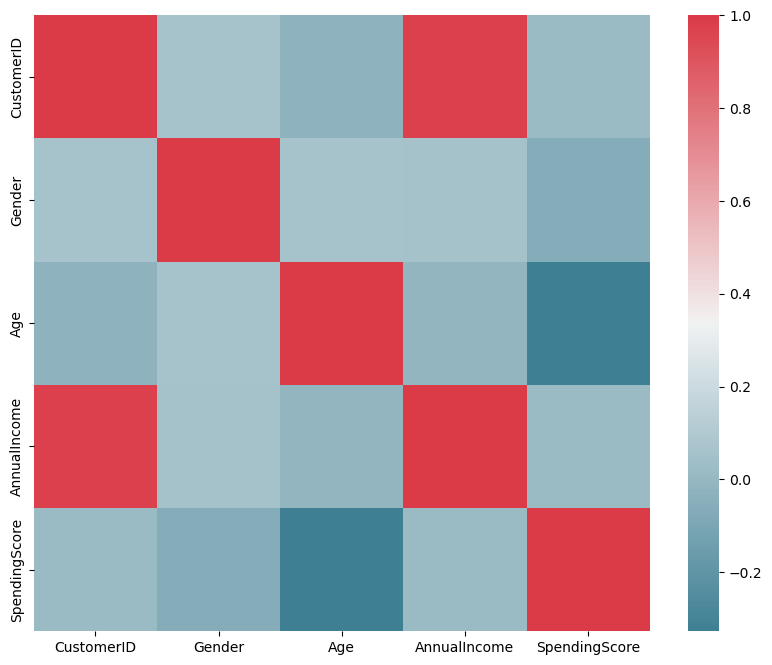

In [5]:
# import packages
import seaborn as sns

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = cdf.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Data shape: (200, 5)
   CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1       1   19            15             39
1           2       1   21            15             81
2           3       0   20            16              6
3           4       0   23            16             77
4           5       0   31            17             40


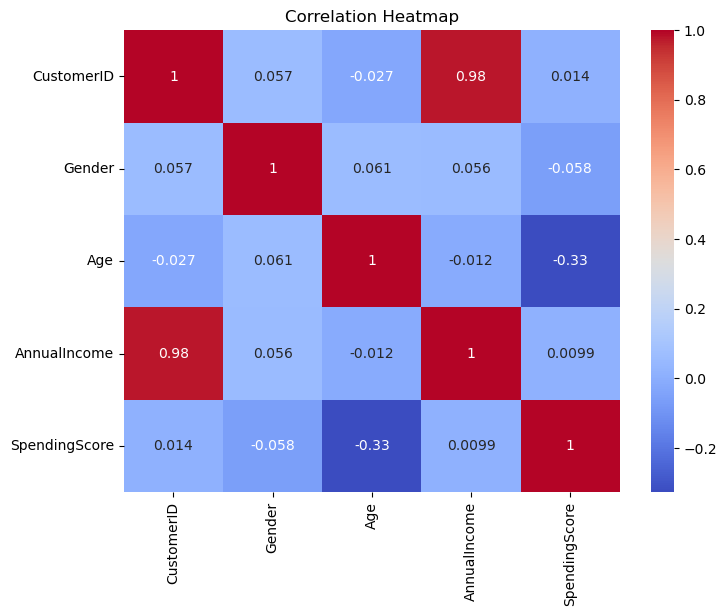

In [32]:
print("Data shape:", df.shape)
print(df.head())


plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [42]:
# Preprocessing on the splitted data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_SS[:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_SS[:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

# 3. Clustering Algorithms

In [52]:
def evaluate_clustering(labels, data, name="Model"):
    sil = silhouette_score(data, labels)
    dbi = davies_bouldin_score(data, labels)
    print(f"{name}: Silhouette={sil:.3f}, Davies-Bouldin={dbi:.3f}")
    return sil, dbi

results = {}

## K-Means Clustering

In [54]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
results["KMeans"] = evaluate_clustering(kmeans_labels, X_scaled, "KMeans")

X["Clus_km"] = kmeans_labels
X.head(10)

KMeans: Silhouette=0.371, Davies-Bouldin=0.995


C:\Users\hamid\.conda\envs\anaconda-ml-ai\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Clus_km,Clus_h,Clus_db
0,1,2,19,15,39,3,0,-1
1,2,2,21,15,81,3,0,-1
2,3,1,20,16,6,1,2,-1
3,4,1,23,16,77,2,1,-1
4,5,1,31,17,40,2,2,-1
5,6,1,22,17,76,2,1,-1
6,7,1,35,18,6,1,2,-1
7,8,1,23,18,94,2,1,-1
8,9,2,64,19,3,0,4,-1
9,10,1,30,19,72,2,1,-1


In [55]:
cdf.groupby('Clus_km').mean()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Clus_h,Clus_db
Clus_km,,,,,,,
0,84.366667,2.0,58.166667,53.633333,37.566667,3.833333,-1.000000
1,94.818182,1.0,48.109091,58.818182,34.781818,2.000000,-0.672727
2,100.210526,1.0,28.438596,59.666667,67.684211,1.070175,0.526316
3,100.809524,2.0,28.690476,60.904762,70.238095,0.190476,-1.000000
4,150.500000,2.0,34.562500,81.812500,12.000000,2.812500,-1.000000


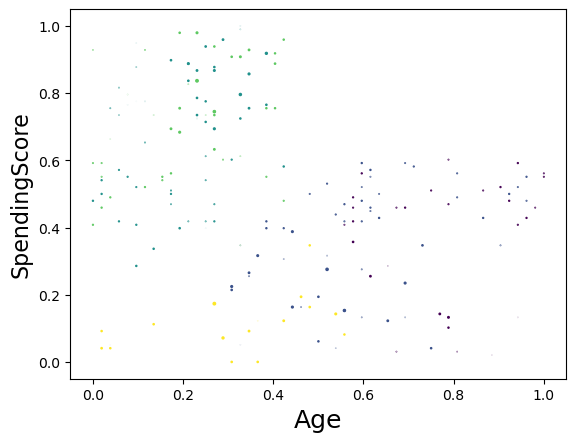

In [59]:
area = np.pi * ( X_scaled[:, 2])**2  
plt.scatter(X_scaled[:, 1], X_scaled[:, 3], s=area, c=kmeans_labels, alpha=1)
plt.xlabel('Age', fontsize=18)
plt.ylabel('SpendingScore', fontsize=16)
plt.show()

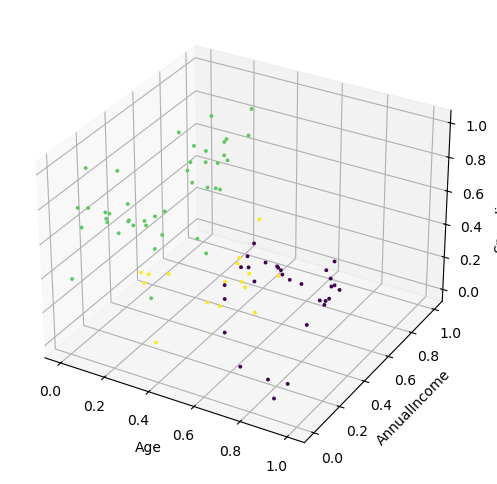

In [61]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Age',fontsize=10)
ax.set_ylabel('AnnualIncome',fontsize=10)
ax.set_zlabel('SpendingScore',fontsize=10)

area = np.pi * ( X_scaled[:, 0])**2  
ax.scatter(X_scaled[:, 1], X_scaled[:, 2], X_scaled[:, 3], s=area, c=kmeans_labels, alpha=1)
plt.show()

## Hierarchical Clustering

In [62]:
agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X_scaled)
results["Agglomerative"] = evaluate_clustering(agg_labels, X_scaled, "Agglomerative")

X["Clus_h"] = agg_labels
X.head()

Agglomerative: Silhouette=0.350, Davies-Bouldin=1.094


,Gender,Age,AnnualIncome,SpendingScore,Clus_h
0,2,19,15,39,3
1,2,21,15,81,2
2,1,20,16,6,1
3,1,23,16,77,0
4,1,31,17,40,1


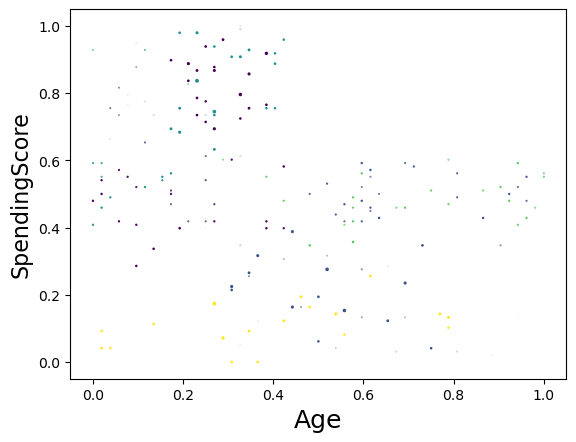

In [63]:
area = np.pi * ( X_scaled[:, 2])**2 
plt.scatter(X_scaled[:, 1], X_scaled[:, 3], s=area, c=agg_labels, alpha=1)
plt.xlabel('Age', fontsize=18)
plt.ylabel('SpendingScore', fontsize=16)
plt.show()

In [64]:
from scipy.spatial import distance_matrix 

dist_matrix = distance_matrix(X_scaled,X_scaled) 
print(dist_matrix)

[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


C:\Users\hamid\AppData\Local\Temp\ipykernel_7204\1644193267.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


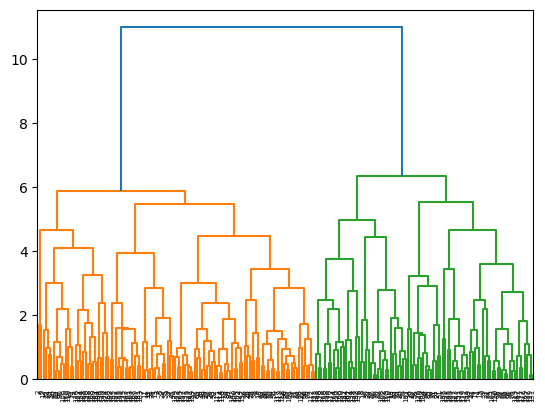

In [65]:
from scipy.cluster import hierarchy 

Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)

## Density-Based Clustering

In [68]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
if len(set(dbscan_labels)) > 1:
    results["DBSCAN"] = evaluate_clustering(dbscan_labels, X_scaled, "DBSCAN")
else:
    print("DBSCAN: produced only one cluster (not meaningful)")


# A sample of clusters
X["Clus_db"] = dbscan_labels
X.head()

DBSCAN: produced only one cluster (not meaningful)


,Gender,Age,AnnualIncome,SpendingScore,Clus_h,Clus_db
0,2,19,15,39,3,0
1,2,21,15,81,2,0
2,1,20,16,6,1,0
3,1,23,16,77,0,0
4,1,31,17,40,1,0


## Gaussian Mixture

In [69]:
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
results["GMM"] = evaluate_clustering(gmm_labels, X_scaled, "Gaussian Mixture")

X["Clus_gmm"] = gmm_labels
X.head()

Gaussian Mixture: Silhouette=0.365, Davies-Bouldin=1.046


C:\Users\hamid\.conda\envs\anaconda-ml-ai\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Gender,Age,AnnualIncome,SpendingScore,Clus_h,Clus_db,Clus_gmm
0,2,19,15,39,3,0,3
1,2,21,15,81,2,0,3
2,1,20,16,6,1,0,2
3,1,23,16,77,0,0,2
4,1,31,17,40,1,0,1


# 4. Visualization (PCA)

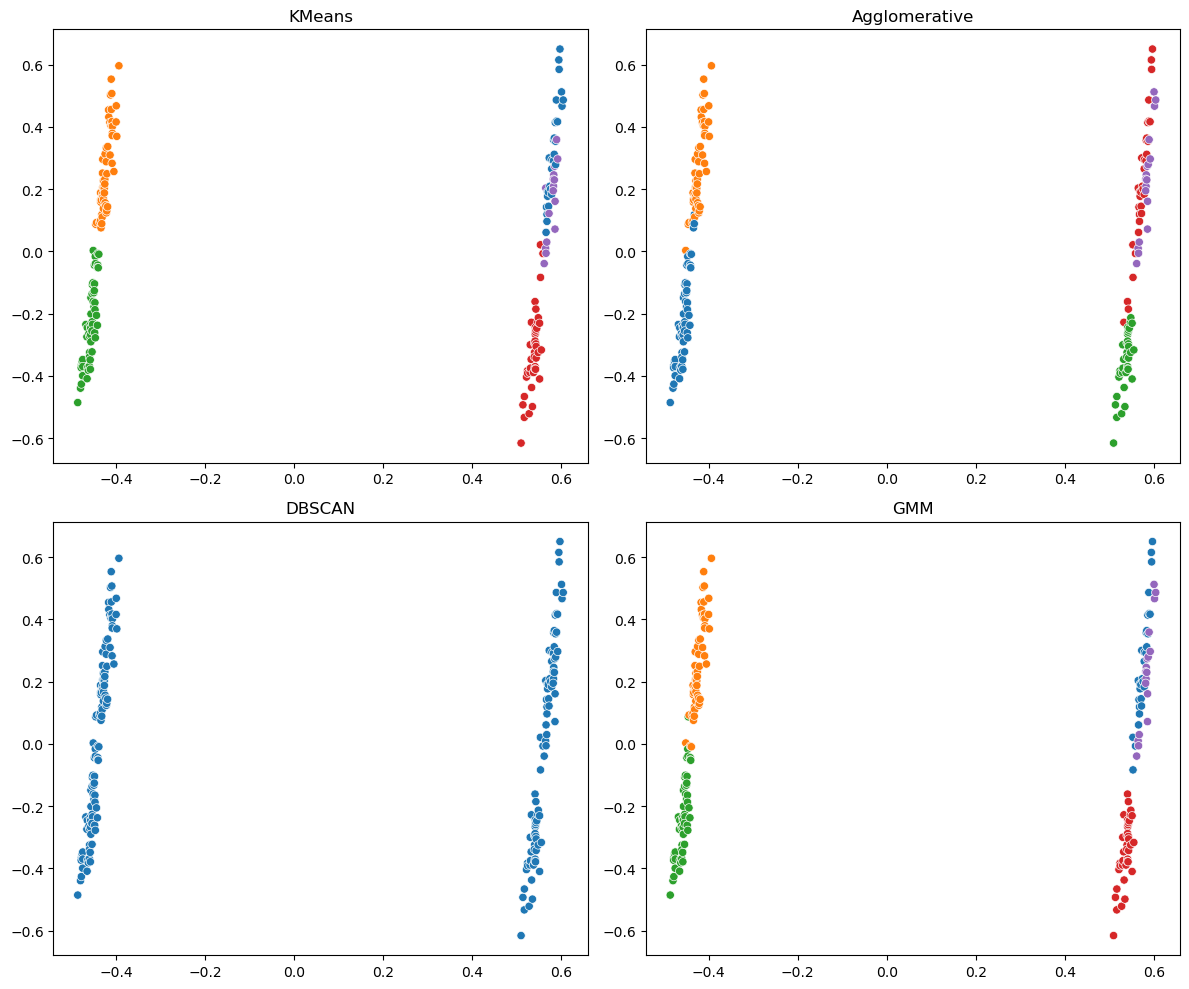

In [72]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
models = {
    "KMeans": kmeans_labels,
    "Agglomerative": agg_labels,
    "DBSCAN": dbscan_labels,
    "GMM": gmm_labels
}


for ax, (name, labels) in zip(axes.flatten(), models.items()):
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="tab10", ax=ax, legend=None)
    ax.set_title(name)


plt.tight_layout()
plt.show()

# 5. Results Summary

In [73]:
print("\nClustering Performance Summary:")
for model, scores in results.items():
    print(f"{model}: Silhouette={scores[0]:.3f}, Davies-Bouldin={scores[1]:.3f}")


Clustering Performance Summary:
KMeans: Silhouette=0.371, Davies-Bouldin=0.995
Agglomerative: Silhouette=0.350, Davies-Bouldin=1.094
GMM: Silhouette=0.365, Davies-Bouldin=1.046
